<div align="center">
Devoir #3<br>

## Guy Junior CALVET
## Entraînement d’un Perceptron MultiCouches (PMC) et d’un Réseau de Neurones Profond de type CNN<br>
## Partie 1
<div align="center">
Dans le cadre du cours 8IAR403 – apprentissage automatique pour la science des données<br><br>
Le 16 avril 2025<br><br>
</div></div>

***

1. But  
● Étudier un réseau de neurones de type Perceptron MultiCouches sur le cas de vente en 
ligne; 
● Étudier un réseau de neurones profond de type convolution (CNN) pour classer des images; 
● Augmentation de données pour « lutter » contre le sur-apprentissage; 
● Transfert d’apprentissage pour réutiliser un modèle pré-entraîné et gagner en performance; 
● Utilisation des bibliothèques standard comme Scikit-Learn, Keras et TensorFlow. 

## 2. Étude de cas

## 2.1 Entraînement d’un classeur binaire et multi-classes pour la vente en ligne avec scikit-learn (6 points)

Dans cette première partie du devoir, on s’intéresse à l’étude de cas de vente en ligne que vous 
avez analysé et extrait des modèles d’apprentissage durant le devoir #2. Dans le cadre de ce devoir#3,
vous utiliserez juste les données Customer (Customer.csv) pour entraîner un Perceptron Multi
Couches (PMC). La bibliothèque scikit-learn offre la classe «MLPClassifier» définie dans le modue 
«sklearn.neural_network», une implémentation du PMC pour la classification. MLPClassifer 
comprend plusieurs hyperparamètres à régler tels que le nombre de neurones par couche c hée 
(hidden_layer_sizes), la fonction d’activation (activation), l’algorithme d’optimisation (solver),etc. 
Consultez la documentation pour plus de détails sur ces hyperparamètres: http:/scikit
learn.org/stable/modules/generated/sklearn. neural_network.MLPClassifie
r.html 
Pour cela, vous devez créer deux classeurs en entrainant deux modèles de PMC.  

#### 2.1.1 
Le premier réseau doit pouvoir classer les clients en 2 classes (binaire) selon le revenu 
comme l’énoncé du devoir #2. Un revenu élvé (supérieur à la moyenne) correspond à a 
classe 1, sinon à la classe 0. Vous pouvez reprendre directement les données du devoir#2. 
• Vous devez donc déterminer la meilleure architecture du PMC en termes de nobre 
de couches cachées et de nombre de neurones par couche cachée. Le nombe de 
couches cachées ne doit pas dépasser 5 couches et le nombre de neurones par ouche 
cachée doit être compris entre 10 et 100 neurones. Cette architecture doit être a plus 
performante en termes d’exactitude (accuracy).  
• Les fonctions d’activation des neurones des couches cachées et de la couche e sortie 
restent à déterminer par vous. 

In [13]:
# Chargement des packages dépendantes

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

In [2]:
# 1. Chargement des données
df = pd.read_csv("Customer.csv")
df['first_item_prize'] = pd.to_numeric(df['first_item_prize'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df.dropna(inplace=True)

In [3]:
df.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113.0
1,34.0,4.0,15.5,Fem,True,2.0,China,36.0
3,20.0,1.0,44.0,Fem,False,2.0,China,71.0
4,39.0,10.0,10.0,Fem,True,4.0,China,80.0
6,36.0,6.0,44.0,Masc,False,2.0,China,51.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               9993 non-null   float64
 1   pages             9993 non-null   float64
 2   first_item_prize  9993 non-null   float64
 3   gender            9993 non-null   object 
 4   ReBuy             9993 non-null   bool   
 5   News_click        9993 non-null   float64
 6   country           9993 non-null   object 
 7   revenue           9993 non-null   float64
dtypes: bool(1), float64(5), object(2)
memory usage: 634.3+ KB


In [5]:
# 2. Prétraitement
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['ReBuy'] = df['ReBuy'].astype(int)
df['country'] = LabelEncoder().fit_transform(df['country'])

In [6]:
df.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,0,0,4.0,8,113.0
1,34.0,4.0,15.5,0,1,2.0,8,36.0
3,20.0,1.0,44.0,0,0,2.0,8,71.0
4,39.0,10.0,10.0,0,1,4.0,8,80.0
6,36.0,6.0,44.0,1,0,2.0,8,51.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               9993 non-null   float64
 1   pages             9993 non-null   float64
 2   first_item_prize  9993 non-null   float64
 3   gender            9993 non-null   int32  
 4   ReBuy             9993 non-null   int32  
 5   News_click        9993 non-null   float64
 6   country           9993 non-null   int32  
 7   revenue           9993 non-null   float64
dtypes: float64(5), int32(3)
memory usage: 585.5 KB


#### a) Entraîner et tester par la validation croisée, prenez une seule valeur de k=3; 

#### b) Mesurer les métriques de précision, rappel et F1-Mesure; 

In [8]:
# 3. Création de la cible binaire
mean_revenue = df['revenue'].mean()
df['target_binary'] = (df['revenue'] > mean_revenue).astype(int)

In [9]:
# 4. Séparation des données
X = df.drop(columns=['revenue', 'target_binary'])
y = df['target_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# 5. Modèle de base avec validation croisee
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=200, random_state=1)
y_pred_cv = cross_val_predict(mlp, X_train, y_train, cv=3)
print("\nRapport de classification - Validation croisée")
print(classification_report(y_train, y_pred_cv))

C:\Users\junio\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\junio\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Rapport de classification - Validation croisée
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      4871
           1       0.69      0.62      0.65      3123

    accuracy                           0.74      7994
   macro avg       0.73      0.72      0.72      7994
weighted avg       0.74      0.74      0.74      7994



C:\Users\junio\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### c) Vérifier si le modèle appris surajuste ou sousajuste les données ? Justifier votre réponse en traçant une courbe d’apprentissage; 

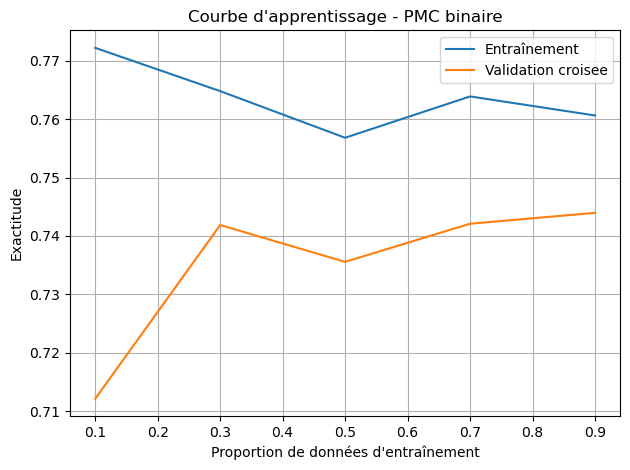

In [14]:
warnings.filterwarnings('ignore')

# 6. Courbe d'apprentissage
train_sizes = np.linspace(0.1, 0.9, 5)
train_scores, val_scores = [], []
for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_train, y_train, train_size=frac, random_state=42)
    mlp.fit(X_part, y_part)
    train_scores.append(mlp.score(X_part, y_part))
    val_scores.append(np.mean(cross_val_score(mlp, X_part, y_part, cv=3)))

plt.plot(train_sizes, train_scores, label='Entraînement')
plt.plot(train_sizes, val_scores, label='Validation croisee')
plt.xlabel("Proportion de données d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - PMC binaire")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Lecture de la courbe
Ligne bleue (Entraînement) :
Commence haut (≈ 0.77) avec peu de données
Décroît légèrement à mesure qu’on ajoute plus de données
Reste stable autour de 0.76

Ligne orange (Validation croisée) :
Commence plus basse (≈ 0.71)
Monte rapidement à ≈ 0.74 et se stabilise



##### Observation	Interprétation
-Ecart entre courbes (train > val)	💡 Léger surapprentissage : le modèle apprend bien sur train mais généralise un peu moins bien
-Stabilisation des courbes	✅ Le modèle ne sous-ajuste pas : il apprend bien des patterns utiles
-Validation plafonne à ~0.74	🔧 Il y a encore marge d’amélioration avec réglage des hyperparamètres

#### d) Optimiser les hyperparamètres suivants : nombre de couches cachées et de neurones par couche cachée, nombre d’itération, solveur, taux d’apprentissage et fonction d’activation. Vous pouvez utiliser la recherche aléatoire –RandomizedSearchCV- au lieu du GridSearchCV pour accélérer la recherche; 

In [15]:
# 7. Optimisation des hyperparamètres
param_dist = {
    'hidden_layer_sizes': [(h,) * l for l in range(1, 6) for h in range(10, 101, 30)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [1e-4, 1e-3, 1e-2],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200]
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=1), param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, random_state=1)
random_search.fit(X_train, y_train)

print("\nMeilleurs hyperparamètres:")
print(random_search.best_params_)


Meilleurs hyperparamètres:
{'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.1, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}


#### e) Tester le meilleur modèle avec un jeu de test et mesurer les différentes métriques de précision, rappel et F1-Mesure; 


Rapport de classification - Test
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1229
           1       0.66      0.69      0.67       770

    accuracy                           0.74      1999
   macro avg       0.73      0.73      0.73      1999
weighted avg       0.75      0.74      0.74      1999



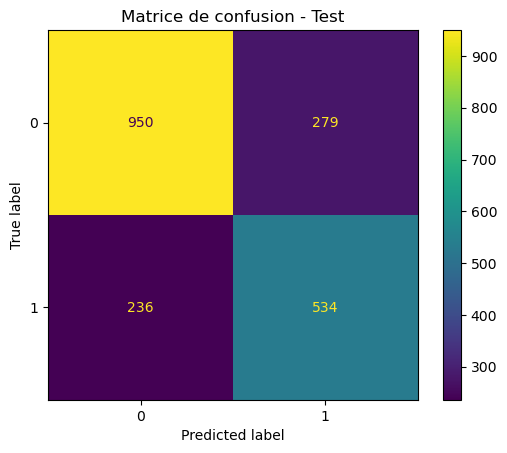

In [16]:
# 8. Test final
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print("\nRapport de classification - Test")
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Matrice de confusion - Test")
plt.show()

#### f) Comparer les résultats obtenus avec ce modèle et celui obtenu dans le devoir#2. 

##### 🔍 Tableau de Synthèse : Comparaison des Classifieurs Binaires

| Critère                        | Arbre de Décision            | Perceptron Multi-Couche (PMC) |
|-------------------------------|-------------------------------|-------------------------------|
| **Exactitude (accuracy)**     | 62%                           | ✅ **74%**                    |
| **F1-score - Classe 0**       | 0.77                          | ✅ **0.79**                   |
| **F1-score - Classe 1**       | ⚠️ **0.01**                   | ✅ **0.67**                   |
| **Rappel - Classe 1**         | 0.00 (aucun vrai positif)     | ✅ 0.69                       |
| **Précision - Classe 1**      | 0.22                          | ✅ 0.66                       |
| **F1-score Macro Moyenne**    | 0.39                          | ✅ **0.73**                   |
| **F1-score Pondérée Moyenne** | 0.48                          | ✅ **0.74**                   |
| **Bilan**                     | ❌ Fort biais vers classe 0   | ✅ Bon équilibre binaire      |
| **Conclusion**                | Modèle très déséquilibré     | ✅ Meilleur choix global      |


#### 2.1.2
Un deuxième classeur qui sera multi-classes, comme le cas du devoir#2, Ce classeur doit être capable de classer les clients, selon le revenu en trois classes : élevé, moyen et bas.  
• Vous devez donc déterminer l’architecture du PMC en termes de nombre de couches cachées et de nombre de neurones par couche cachée. Ça sera les mêmes contraintes que le cas précédent, par rapport aux nombres de couches cachées, de neurones par couches cachées et de la fonction d’activation de ces neurones. Cette architecture doit être la plus performante en termes d’exactitude (accuracy). 

• Les fonctions d’activation des neurones des couches cachées et de la couche de sortie restent à déterminer par vous. 

In [18]:
# 3. Création de la cible multi-classes avec les quartiles
q1 = df['revenue'].quantile(0.25)
q3 = df['revenue'].quantile(0.75)

def label_revenue(rev):
    if rev <= q1:
        return 0  # faible
    elif rev <= q3:
        return 1  # moyen
    else:
        return 2  # élevé

df['target_multi'] = df['revenue'].apply(label_revenue)

In [19]:
# 4. Séparation des données
X = df.drop(columns=['revenue', 'target_multi'])
y = df['target_multi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### a) Entraîner et tester par la validation croisée, prenez une seule valeur de k=3; 

In [20]:
# 5. Modèle de base multi-classes
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=1)
y_pred_cv = cross_val_predict(mlp, X_train, y_train, cv=3)
print("\nRapport de classification - Validation croisée (multi-classes)")
print(classification_report(y_train, y_pred_cv))


Rapport de classification - Validation croisée (multi-classes)
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      1991
           1       0.69      0.64      0.66      3999
           2       0.69      0.86      0.77      2004

    accuracy                           0.67      7994
   macro avg       0.67      0.69      0.67      7994
weighted avg       0.67      0.67      0.67      7994



#### b) Mesurer les métriques de précision, rappel et F1-Mesure; 

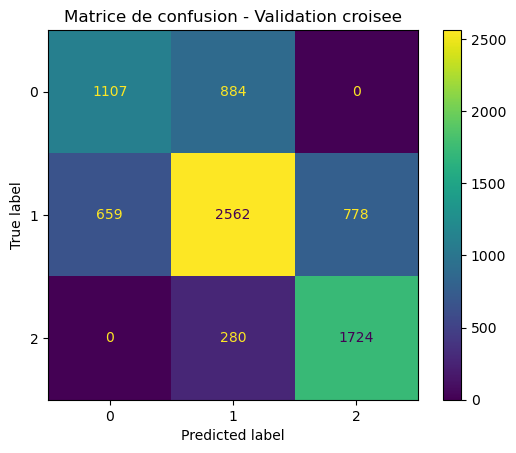

In [21]:
# 6. Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_cv)
plt.title("Matrice de confusion - Validation croisee")
plt.show()

#### c) Vérifier si le modèle appris surajuste ou sousajuste les données ? Justifier votre réponse en traçant une courbe d’apprentissage; 

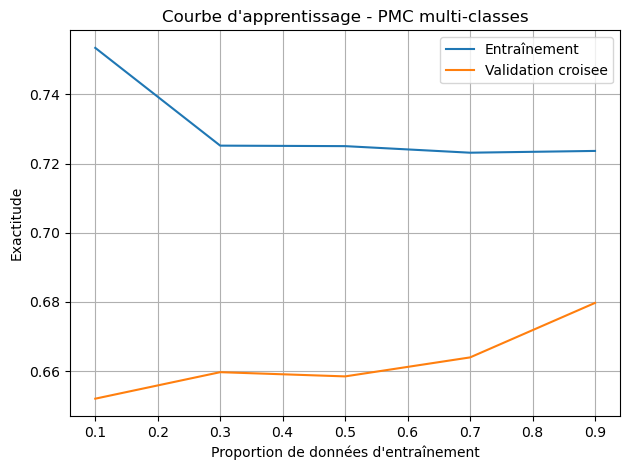

In [22]:
# 7. Courbe d'apprentissage
train_sizes = np.linspace(0.1, 0.9, 5)
train_scores, val_scores = [], []
for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_train, y_train, train_size=frac, random_state=42)
    mlp.fit(X_part, y_part)
    train_scores.append(mlp.score(X_part, y_part))
    val_scores.append(np.mean(cross_val_score(mlp, X_part, y_part, cv=3)))

plt.plot(train_sizes, train_scores, label='Entraînement')
plt.plot(train_sizes, val_scores, label='Validation croisee')
plt.xlabel("Proportion de données d'entraînement")
plt.ylabel("Exactitude")
plt.title("Courbe d'apprentissage - PMC multi-classes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Il y a clairement du sur-ajustement du modèle aux données d'entrainement

#### d) Optimiser les hyperparamètres suivants : nombre de couches cachées et de neurones par couche cachée, nombre d’itération, solveur, taux d’apprentissage et fonction d’activation. Vous pouvez utiliser la recherche aléatoire –RandomizedSearchCV- au lieu du GridSearchCV pour accélérer la recherche; 

In [23]:
# 8. Optimisation des hyperparamètres
param_dist = {
    'hidden_layer_sizes': [(h,) * l for l in range(1, 4) for h in range(50, 151, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [1e-4, 1e-3, 1e-2],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200]
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=1), param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, random_state=1)
random_search.fit(X_train, y_train)

print("\nMeilleurs hyperparamètres:")
print(random_search.best_params_)



Meilleurs hyperparamètres:
{'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}


#### e) Tester le meilleur modèle avec un jeu de test et mesurer les différentes métriques de précision, rappel et F1-Mesure; 


Rapport de classification - Test (multi-classes)
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       534
           1       0.71      0.65      0.68       971
           2       0.70      0.89      0.78       494

    accuracy                           0.70      1999
   macro avg       0.70      0.72      0.70      1999
weighted avg       0.70      0.70      0.70      1999



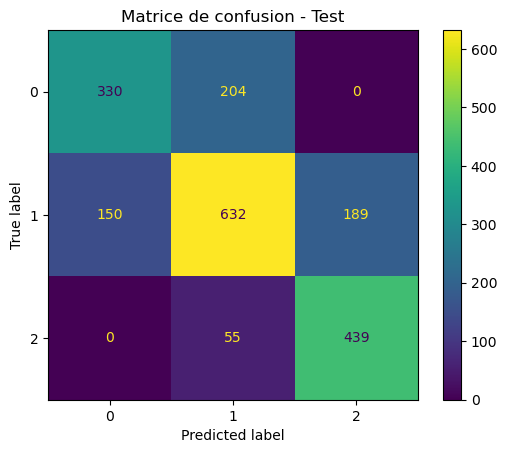

In [24]:
# 9. Test final
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print("\nRapport de classification - Test (multi-classes)")
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Matrice de confusion - Test")
plt.show()


#### f) Comparer les résultats obtenus avec ce modèle et celui obtenu dans le devoir#2. 

## 📊 Synthèse Comparée des Modèles de Classification Multi-Classes

### 🎯 Objectif :
Classer les clients selon leur revenu :
- **Classe 0** : revenu faible
- **Classe 1** : revenu moyen
- **Classe 2** : revenu élevé

---

### ✅ Résultats comparés

| Critère                        | Arbre de Décision             | Perceptron Multi-Couche (PMC)       |
|-------------------------------|-------------------------------|-------------------------------------|
| **Exactitude (accuracy)**     | 51%                           | ✅ **70%**                           |
| **F1-score - Classe 0**       | ⚠️ 0.01                        | ✅ **0.65**                          |
| **F1-score - Classe 1**       | ✅ 0.67                        | ✅ **0.68**                          |
| **F1-score - Classe 2**       | ❌ 0.00                        | ✅ **0.78**                          |
| **F1-score Macro Moyenne**    | 0.23                          | ✅ **0.70**                          |
| **F1-score Pondérée Moyenne** | 0.34                          | ✅ **0.70**                          |

---

### 🔍 Interprétation

- **Arbre de Décision** :
  - Prédit **presque exclusivement** les revenus moyens (classe 1)
  - **Ignore** les clients à faible et haut revenu
  - Très déséquilibré malgré un bon score sur 1 seule classe

- **PMC (MLPClassifier)** :
  - **Équilibre la prédiction** entre les 3 catégories
  - Reconnaît très bien les revenus élevés (**rappel = 0.89**)
  - Performant même sur les classes minoritaires

---

### ✅ Conclusion
Le modèle **PMC est largement supérieur** :
- Meilleure capacité à **généraliser**
- Moins de biais vers une seule classe
- Meilleumodèle de production pour ce cas d’usage.

